In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_datareader import data 
from datetime import date as dt
import matplotlib.pyplot as plt

In [2]:
%config IPCompleter.greedy=True

In [ ]:
#Tipos de Perfis
# 1-Ultraconservador
# 2-Conservador mente aberta
# 3-Arrojado
# 4-Oportunista
# 5-Especulador
# 6-Relaxado

In [3]:
train_profile = pd.read_csv("ClassificationModel_TrainProfile.csv",sep=";")

In [4]:
X = train_profile[['Q1','Q2','Q3','Q4','Q5','Q6','Q7']]

In [5]:
y = train_profile['Perfil']

Text(0, 0.5, 'Q6')

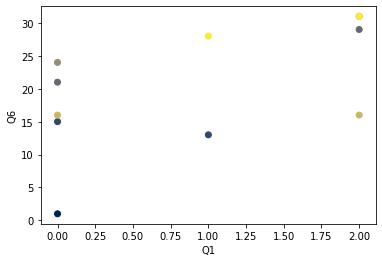

In [6]:
plt.scatter(train_profile['Q1'], train_profile['Q6'],
            c=train_profile['Perfil'], cmap='cividis')
plt.xlabel("Q1")
plt.ylabel("Q6")

In [ ]:
sns.heatmap(train_profile.corr(),annot=True)

In [ ]:
#Grid Search SVM
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['linear','poly','rbf','sigmoid'],'C':range(1,20),'gamma':range(1,200)} 
# from sklearn import svm
# svm = svm.SVC()
# clf = GridSearchCV(svm, parameters , cv=2)
# clf.fit(X,y)

In [ ]:
# clf.best_params_

In [ ]:
# from sklearn import svm
# svm = svm.SVC(kernel='linear',C=1,gamma=1)
#svm.fit(X,y)

In [ ]:
# svm.score(X,y)

In [6]:
#Grid Search Tree Desicion
from sklearn.model_selection import GridSearchCV
from sklearn import tree
tree = tree.DecisionTreeClassifier()
parameters = {'max_depth':range(1,100),'criterion':['gini','entropy'],'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
grid = GridSearchCV(tree,parameters,cv=2)
grid.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100),
                        

In [ ]:
grid.best_params_

In [7]:
from sklearn import tree
tree_model_profile = tree.DecisionTreeClassifier(criterion='gini',max_depth=40,min_samples_leaf=1,min_samples_split=2)
tree_model_profile.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
tree_model_profile.score(X,y)

In [8]:
train_teste_profile = pd.read_csv("Train_Profile.csv",sep=";")

In [9]:
X_test = train_teste_profile[['Q1','Q2','Q3','Q4','Q5','Q6','Q7']]

In [10]:
y_test = train_teste_profile['Perfil']

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model_profile, X_test, y_test , cv=6)
scores

array([0.94666667, 0.925     , 0.94      , 0.93      , 0.90166667,
       0.92666667])

In [ ]:
scores.mean()

In [12]:
from joblib import dump, load
dump(tree_model_profile, 'Profiles.joblib')

['Profiles.joblib']

In [13]:
tree_model_profile = load('Profiles.joblib')

In [ ]:
#Acurácia no teste
    #SVM
#84,19%
    #Decision Tree
#93,08%

In [ ]:
#Parte dos FII

In [17]:
finance_train = pd.read_csv("FundosTrain.csv")

In [18]:
finance_train['Ticker'] = finance_train['Ticker'] + ".SA"

In [19]:
startDate = '2013-01-01'
volatibilidade = [];
rentabilidade = [];

for i in finance_train['Ticker']:
    read_data = data.DataReader(i,start = startDate,data_source = "yahoo")
    close = read_data['Close']
    rentail = read_data['Adj Close']
    volatibilidade.append(close.var())
    rentabilidade.append(((rentail/rentail.shift(1))-1).mean()*250)
    
finance_train["Volatibilidade"] = volatibilidade

finance_train["Rentabilidade Anual"] = rentabilidade

In [ ]:
finance_train.head()

In [20]:
finance_train = finance_train.drop(columns=['Público Alvo','DY no Ano','Nome','Preço de Cálculo DY','Preço Anterior','Valor Patrimonial','Patrimônio Líquido'])

In [21]:
finance_train = finance_train.fillna(0)

In [22]:
finance_train['Variação em % no Dia'] = finance_train['Variação em % no Dia'].apply(lambda x: float(x[:4].replace(',','.')))

In [23]:
finance_train['Valorização da Cota no Mês'] = finance_train['Valorização da Cota no Mês'].apply(lambda x:float(x[:4].replace(',','.')))

In [24]:
finance_train['DY Médio  (12 meses)'] = finance_train['DY Médio  (12 meses)'].apply(lambda x:float(x[:4].replace(',','.')))

In [25]:
finance_train['Rentabilidade no mês'] = finance_train['Rentabilidade no mês'].apply(lambda x:float(x[:4].replace(',','.')))

In [26]:
finance_train['P/VPA'] = finance_train['P/VPA'].apply(lambda x:float(x.replace(',','.')))

In [27]:
#Relaxado como padrão de FII
finance_train['Perfil'] = 6

In [28]:
#Ultraconservador
finance_train.loc[(finance_train['Volatibilidade'] < 1.0) & (finance_train['Variação em % no Dia'] < 0.5) & (finance_train['Valorização da Cota no Mês'] < 0.5),'Perfil'] = 1

In [29]:
#Conservador de mente aberta
finance_train.loc[(finance_train['Volatibilidade'] <= 3.0) & (finance_train['Variação em % no Dia'] < 1.0) & (finance_train['Valorização da Cota no Mês'] > 1.0),'Perfil'] = 2

In [31]:
#Oportunista
finance_train.loc[(finance_train['Volatibilidade'] > 4.0) & (finance_train['Variação em % no Dia'] > 2.0) & (finance_train['Valorização da Cota no Mês'] < 3.0),'Perfil'] = 4

In [32]:
#Especulador
finance_train.loc[(finance_train['Volatibilidade'] > 5.0) &  (finance_train['Valorização da Cota no Mês'] > 5 ),'Perfil'] = 5

In [48]:
#Arrojado
finance_train.loc[(finance_train['Volatibilidade'] > 3.0) & (finance_train['Variação em % no Dia'] < 4.0) & (finance_train['Valorização da Cota no Mês'] > 7.0),'Perfil'] = 3

In [33]:
#Relaxado
relaxado = finance_train.loc[(finance_train['Volatibilidade'] < 3.0) & (finance_train['Variação em % no Dia'] < 5.0)]

In [34]:
#Dummmy Segmento
dummy_segmento = pd.get_dummies(finance_train['Segmento'])
finance_train = pd.concat([finance_train,dummy_segmento],axis=1)

In [ ]:
segmento = finance_train.drop(columns=['Segmento'])

In [35]:
ticker = finance_train.drop(columns=['Ticker'])

In [ ]:
finance_train.head()

In [36]:
X_perfis = finance_train[['Variação em % no Dia','Valorização da Cota no Mês','DY Médio  (12 meses)','Rentabilidade no mês','P/VPA','Volatibilidade','Rentabilidade Anual','Hotel','Híbrido','Lajes Corporativas','Logística','Outros','Shoppings','Títulos e Val. Mob.']]

In [37]:
y_perfis = finance_train['Perfil']

In [38]:
#Grid Search Tree Desicion
from sklearn.model_selection import GridSearchCV
from sklearn import tree
tree = tree.DecisionTreeClassifier()
parameters = {'max_depth':range(1,100),'criterion':['gini','entropy'],'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
grid = GridSearchCV(tree,parameters,cv=2)
grid.fit(X_perfis,y_perfis)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100),
                        

In [ ]:
grid.best_params_

In [39]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1,min_samples_split=4)
tree_model.fit(X_perfis,y_perfis)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
tree_model.score(X_perfis,y_perfis)

0.9836065573770492

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model, X_perfis, y_perfis , cv=6)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


array([0.76923077, 0.91666667, 0.9       , 1.        , 1.        ,
       1.        ])

In [ ]:
scores.mean()

In [ ]:
#Scores de acordo com o cross validation
#Tree Decision = 93.32%

In [42]:
from joblib import dump, load
dump(tree_model, 'Profiles_Finance.joblib')

['Profiles_Finance.joblib']

In [43]:
tree_model = load('Profiles_Finance.joblib')

In [44]:
def profile_print(val):
    if val == 1:
           imp = print('Ultraconservador')
    elif val == 2:
        imp = print('Conservador de Mente Aberta')
    elif val == 3:
        imp = print('Arrojado')
    elif val == 4:
        imp = print('Oportunista')
    elif val == 5:
        imp = print('Especulador')
    else:
        imp = print('Especulador')
    return imp

In [45]:
val = tree_model_profile.predict([[2,1,2,2,3,29,2]])[0]

In [46]:
finance_train['Ticker'] = ticker
finance_train['Segmento'] = segmento

In [53]:
profile_recommend = finance_train.loc[(finance_train['Perfil'] == val)]

In [60]:
print('Recomendação para o seu perfil de investidor:')
profile_print(val)
profile_recommend = profile_recommend[['Ticker','Segmento','Rentabilidade Anual']]
profile_recommend.head()

Recomendação para o seu perfil de investidor:
Arrojado


,Ticker,Segmento,Rentabilidade Anual
10,Lajes Corporativas,CBOP11.SA,0.073456
17,Lajes Corporativas,HGPO11.SA,0.272329
18,Shoppings,HGBS11.SA,0.060567
22,Shoppings,PQDP11.SA,0.214337
25,Outros,HCTR11.SA,0.654149
